In [1]:
"""Going off of the article here: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 """

'Going off of the article here: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 '

In [9]:
import pandas as pd

articles = pd.read_csv('../process_articles/processed_articles.csv')

articles = articles.sample(100)
print(len(articles))
articles.head(1)

100


,authors,title,date,year,edition,url,text,cleaned_text,cleaned_text_wspaces,unigram,bigram,unigram_count,bigram_count
371,['施郑平'],赓续历史文脉 谱写当代华章,2023-09-01,2023.0,17.0,http://www.qstheory.cn/dukan/qs/2023-09/01/c_1...,习近平总书记在文化传承发展座谈会上的重要讲话，从党和国家事业发展全局战略高度，对中华文化传承...,习近平总书记在文化传承发展座谈会上的重要讲话从党和国家事业发展全局战略高度对中华文化传承发展...,习近平 总书记 在 文化 传承 发展 座谈会 上 的 重要讲话 从 党和国家 事业 发展 全...,"['习近平', '总书记', '在', '文化', '传承', '发展', '座谈会', '...","['习近平总书记', '总书记在', '在文化', '文化传承', '传承发展', '发展座...","{'的': 25, '文化': 18, '和': 9, '了': 9, '中国': 9, '...","{'中华优秀': 5, '优秀传统': 5, '传统文化': 5, '中华文明的': 4, ..."


In [13]:
# get just the text
articles_text = articles["cleaned_text_wspaces"]
articles_text = articles_text.dropna()
articles_text.head()

371     习近平 总书记 在 文化 传承 发展 座谈会 上 的 重要讲话 从 党和国家 事业 发展 全...
427     编辑 同志 当前 第二批 学习 贯彻 习近平 新 时代 中国 特色 社会主义 思想 主题 教...
445     时代 楷模 中国 援外 医疗队 群体 代表 图为 中国 援外 医疗队 群体 代表 时代 楷模...
1669    总书记 说 他 来 这儿 是 来 看望 秦巴山区 的 群众 来 了 听到 这句 话 我 一下...
1562    2020 年 5 月 28 日 十三届 全国人大 三次 会议 审议 通过 了 中华人民共和国...
Name: cleaned_text_wspaces, dtype: object

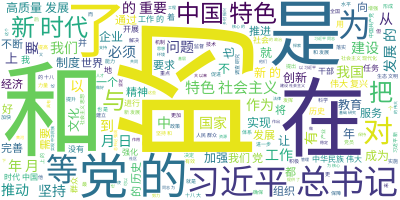

In [25]:
# make a word cloud... https://amueller.github.io/word_cloud/auto_examples/wordcloud_cn.html - one link, didn't seem to work
from wordcloud import WordCloud

long_string = ' '.join(list(articles_text))

font_path = '/Users/calebharding/Documents/BYU/2023-2024/China_Project/qiushi_venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/NotoSansSC-Regular.ttf'

# Create a WordCloud object
wordcloud = WordCloud(font_path=font_path, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()